<a href="https://colab.research.google.com/github/Merm-A-de/Beginner-ML-AI/blob/main/First_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH HELP FROM ONLINE


In [ ]:
import numpy
import matplotlib.pyplot as plt
import matplotlib
import pandas
import sklearn
import scipy




In [ ]:
import sys 
print('Python: {}'.format(sys.version))

Python: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


In [ ]:
from pandas import read_csv

In [ ]:


# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [ ]:
# change the size of the figures shown (graphs)

from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=180)

plt.rcParams['figure.figsize'] = (10,10)

# To reset figsize to defaults -->
#plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']


<Figure size 1440x1080 with 0 Axes>

In [ ]:

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [ ]:
dataset.shape

(150, 5)

In [ ]:
#first ten rows of data
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#quick hi-level summary

dataset.describe ()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#amount of each form of chosen category

dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

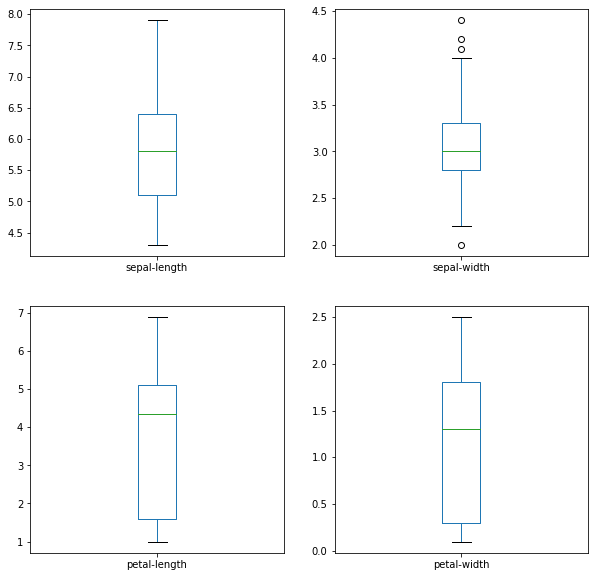

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey = False)
pyplot.show()

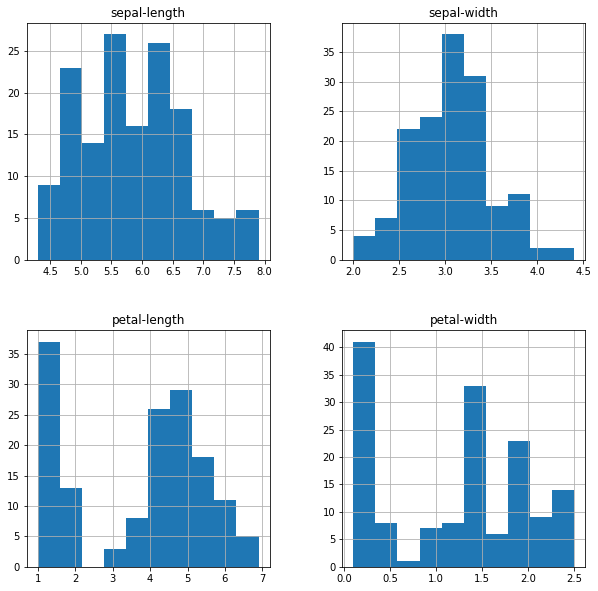

In [ ]:
dataset.hist()
pyplot.show()

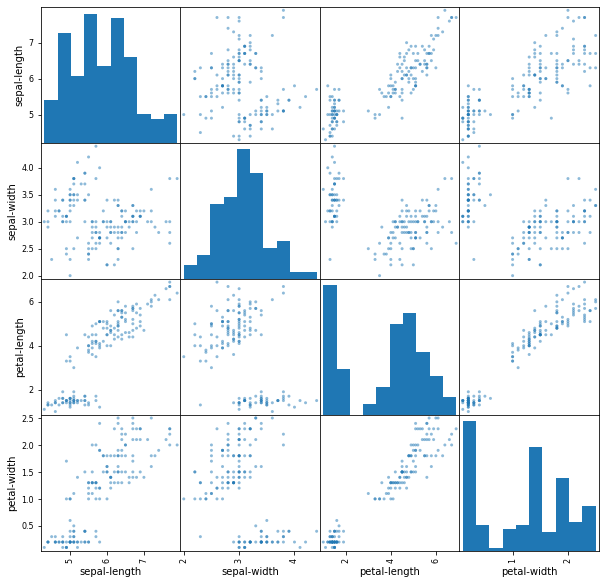

In [ ]:
scatter_matrix(dataset)
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation, = train_test_split(X, Y, test_size=0.2, random_state = 1)



In [ ]:
...

"""
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
"""

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.053359)
KNN: 0.966667 (0.055277)
CART: 0.941667 (0.053359)
NB: 0.958333 (0.041667)
SVM: 0.975000 (0.038188)


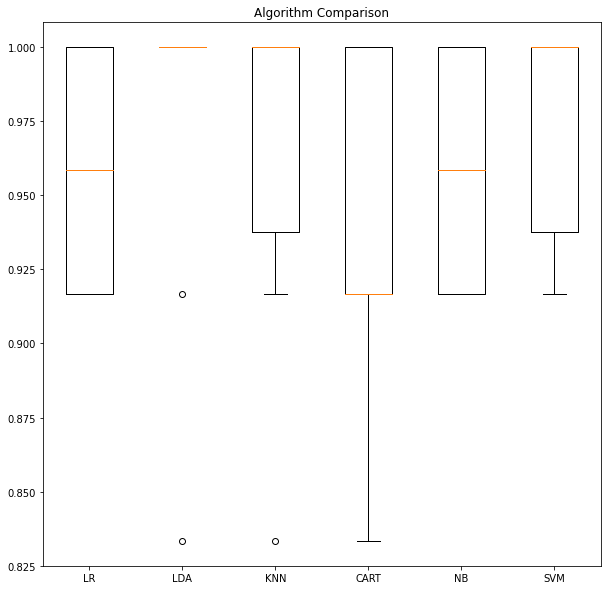

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
#create predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print('Prediction Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Prediction Accuracy: 0.9333333333333333
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



In [ ]:
myarray = numpy.array([[1,2,3], [4,5,6]])
rownames = ['a','b']
colnames = ['one', 'two', 'three']
df = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(df)

   one  two  three
a    1    2      3
b    4    5      6


In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
indian_Data = pandas.read_csv(url)# names=names)

indians_Diab_Shape = indian_Data.shape
print(indians_Diab_Shape)


(767, 9)


In [ ]:

indians_Diab_Description = (indian_Data.describe())
print(indians_Diab_Description)

                6         148          72  ...       0.627          50           1
count  767.000000  767.000000  767.000000  ...  767.000000  767.000000  767.000000
mean     3.842243  120.859192   69.101695  ...    0.471674   33.219035    0.348110
std      3.370877   31.978468   19.368155  ...    0.331497   11.752296    0.476682
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243500   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.371000   29.000000    0.000000
75%      6.000000  140.000000   80.000000  ...    0.625000   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


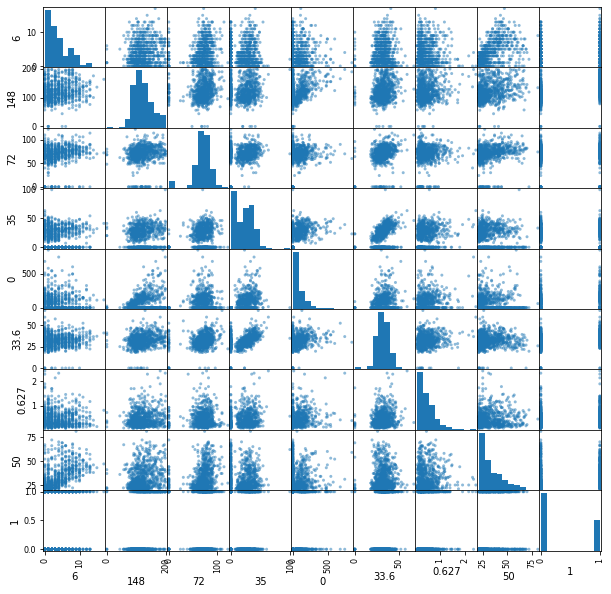

In [ ]:

indians_Diab_Scatter = scatter_matrix(indian_Data)
plt.show()

[]

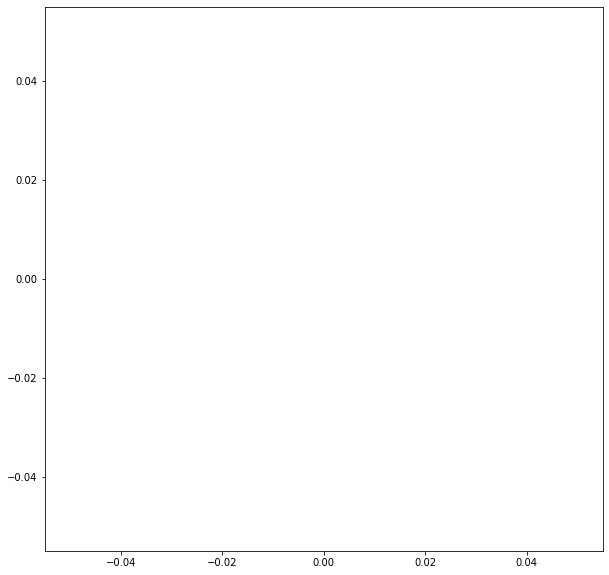

In [ ]:
indian_Data
plt.plot(kind='box')